# Resumen de métricas de PyOD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score

Creamos csv general de etiquetado:

In [2]:
pyod = pd.read_csv('PyOD/Resultados/HBOS_completo.csv')
pyod = pyod.drop('Y_pred', axis=1)

Leemos la predicción de cada método:

In [3]:
hbos = pd.read_csv('PyOD/Resultados/HBOS_completo.csv',usecols=['Y_pred'])
iforest = pd.read_csv('PyOD/Resultados/IForest_completo.csv',usecols=['Y_pred'])
knn = pd.read_csv('PyOD/Resultados/KNN_completo.csv',usecols=['Y_pred'])
loda = pd.read_csv('PyOD/Resultados/LODA_completo.csv',usecols=['Y_pred'])
mad = pd.read_csv('PyOD/Resultados/MAD_completo.csv',usecols=['Y_pred'])
mcd = pd.read_csv('PyOD/Resultados/MCD_completo.csv',usecols=['Y_pred'])

La unimos al csv general:

In [4]:
pyod['HBOS'] = hbos['Y_pred']
pyod['IForest'] = iforest['Y_pred']
pyod['KNN'] = knn['Y_pred']
pyod['LODA'] = loda['Y_pred']
pyod['MAD'] = mad['Y_pred']
pyod['MCD'] = mcd['Y_pred']

In [5]:
pyod = pyod.set_index('fecha')

In [6]:
pyod.head()

,Negro,CurvaCola,Congelado,Hum,Anomalia,HBOS,IForest,KNN,LODA,MAD,MCD
fecha,,,,,,,,,,,
2021-08-01 11:06:00,0,0,0,0,0,1,1,1,1,0,1
2021-03-15 11:15:00,0,0,0,0,0,0,0,0,0,0,0
2021-10-19 07:04:00,0,0,0,0,0,0,0,1,0,0,0
2021-04-17 10:46:00,0,0,0,0,0,0,0,0,0,0,0
2021-03-07 19:50:00,0,0,0,0,0,0,0,0,0,0,0


## Métricas generales:

In [7]:
anomalias = ['Anomalia','Negro','CurvaCola','Congelado','Hum']
metodos = ['HBOS','IForest','KNN','LODA','MAD','MCD']
metricas = ['roc_auc','accuracy','precision','kappa','sensibilidad','especificidad']

metricas_generales = pd.DataFrame(index=metodos,columns=metricas)
for metodo in metodos:
    metricas_generales.loc[metodo,metricas[0]] = roc_auc_score(pyod['Anomalia'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[1]] = accuracy_score(pyod['Anomalia'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[2]] = precision_score(pyod['Anomalia'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[3]] = cohen_kappa_score(pyod['Anomalia'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[4]] = recall_score(pyod['Anomalia'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[5]] = recall_score(pyod['Anomalia'], pyod[metodo], pos_label=0)
metricas_generales

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS,0.564536,0.801362,0.347539,0.153723,0.207871,0.9212
IForest,0.606131,0.825748,0.468348,0.254026,0.275384,0.936878
KNN,0.532171,0.782351,0.256288,0.076334,0.155397,0.908946
LODA,0.61083,0.828185,0.480738,0.265057,0.28349,0.93817
MAD,0.685715,0.889339,0.909417,0.484083,0.379053,0.992376
MCD,0.528716,0.781276,0.247818,0.068385,0.148358,0.909075


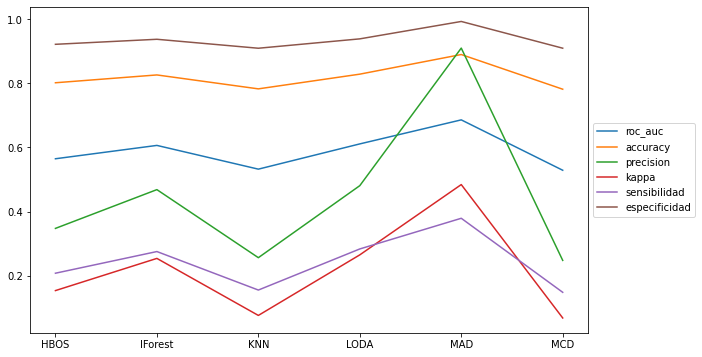

In [8]:
metricas_generales.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

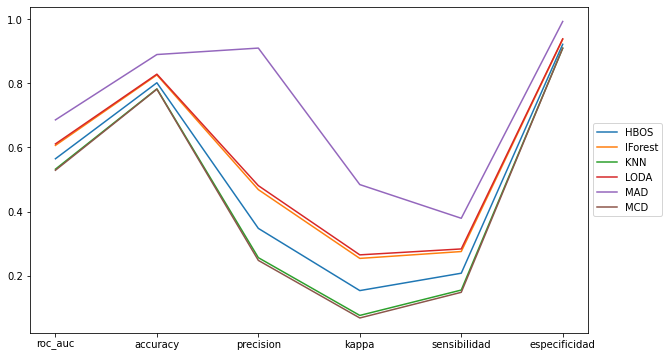

In [9]:
metricas_generales.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

## Sensibilidad por tipo de anomalía

In [10]:
sensibilidades = pd.DataFrame(index=metodos, columns=anomalias)

for metodo in metodos:
    for anomalia in anomalias:
        sensibilidades.loc[metodo,anomalia] = recall_score(pyod[anomalia], pyod[metodo])

sensibilidades

,Anomalia,Negro,CurvaCola,Congelado,Hum
HBOS,0.207871,0.27432,0.11543,0.293006,0.866221
IForest,0.275384,0.431151,0.133984,0.485618,0.83612
KNN,0.155397,0.174077,0.125977,0.163001,0.381271
LODA,0.28349,0.462409,0.126953,0.51269,0.852843
MAD,0.379053,0.737807,0.087109,0.911732,1.0
MCD,0.148358,0.216114,0.10332,0.119571,0.274247


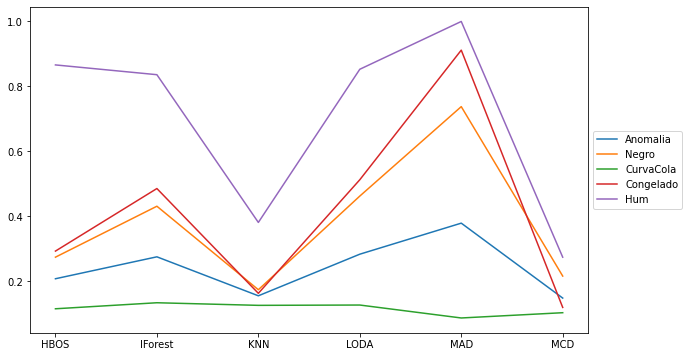

In [11]:
sensibilidades.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

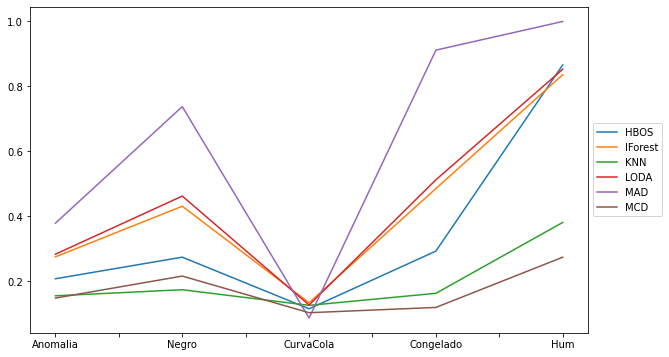

In [12]:
sensibilidades.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))